In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset = train.flow_from_directory('train/',
                                         target_size= (224,224),
                                          batch_size= 16,
                                          class_mode= 'binary'
                                         )

validation_dataset = train.flow_from_directory('validation/',
                                         target_size= (224,224),
                                          batch_size= 16,
                                          class_mode= 'binary'
                                         )

Found 200 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'drunk': 0, 'normal': 1}

In [5]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),                     
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [8]:
 model_fit = model.fit(train_dataset,
                      steps_per_epoch =10,
                      epochs=50,
                      validation_data = validation_dataset)

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 1.8958 - accuracy: 0.4803 - val_loss: 1.1275 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 10s 973ms/step - loss: 0.7392 - accuracy: 0.6513 - val_loss: 0.4435 - val_accuracy: 0.9000
Epoch 3/50
10/10 [==============================] - 10s 948ms/step - loss: 0.4320 - accuracy: 0.8487 - val_loss: 0.6813 - val_accuracy: 0.6000
Epoch 4/50
10/10 [==============================] - 9s 886ms/step - loss: 0.3987 - accuracy: 0.8355 - val_loss: 1.0704 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 9s 880ms/step - loss: 0.3461 - accuracy: 0.8355 - val_loss: 0.2314 - val_accuracy: 0.9000
Epoch 6/50
10/10 [==============================] - 9s 896ms/step - loss: 0.2264 - accuracy: 0.8882 - val_loss: 0.0824 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 9s 916ms/step - loss: 0.5530 - accuracy: 0.8553 - val_loss: 0.3755 - val_accuracy: 0.8000
Epoch 

In [9]:
model.save('Final_model.h5')

In [10]:
new_model=tf.keras.models.load_model('Final_model.h5')



########################################################################################


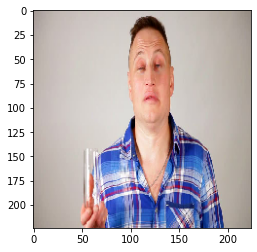

      Prediction : Intoxicated


########################################################################################


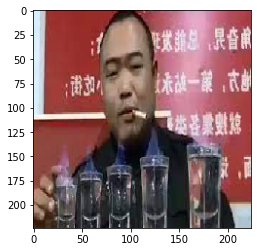

      Prediction : Intoxicated


########################################################################################


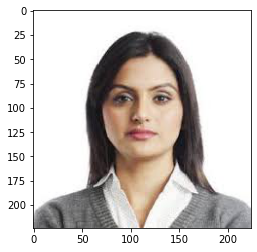

      Prediction : Intoxicated


########################################################################################


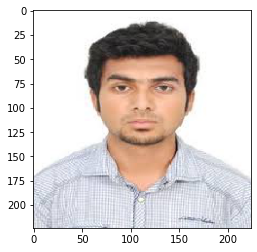

      Prediction : Normal


########################################################################################


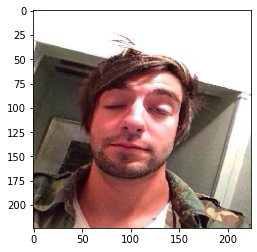

      Prediction : Intoxicated


########################################################################################


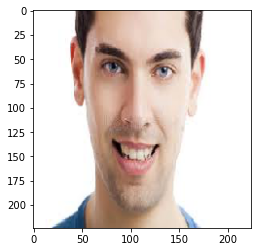

      Prediction : Normal


########################################################################################


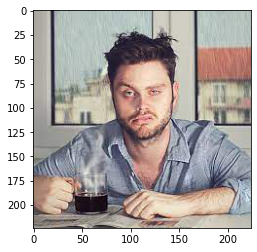

      Prediction : Intoxicated


########################################################################################


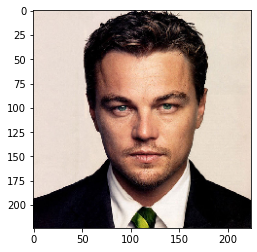

      Prediction : Normal


########################################################################################


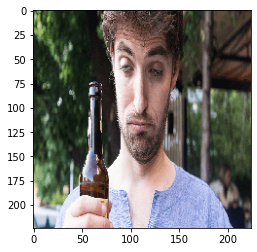

      Prediction : Intoxicated


########################################################################################


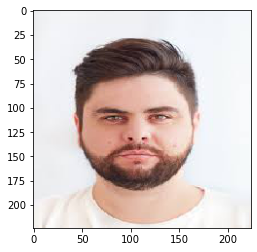

      Prediction : Normal


########################################################################################


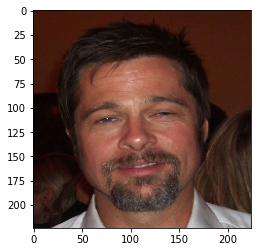

      Prediction : Intoxicated


In [13]:
dir_path = 'test'
for i in os.listdir(dir_path):
    print("\n\n########################################################################################")
    img = image.load_img(dir_path+'/'+i,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    value = new_model.predict(images)
    if value==0:
        print("      Prediction : Intoxicated")
    else:
        print("      Prediction : Normal")

